### Τεχνολογίες Κινητού Υπολογισμού 
με Μηχανική Μάθηση
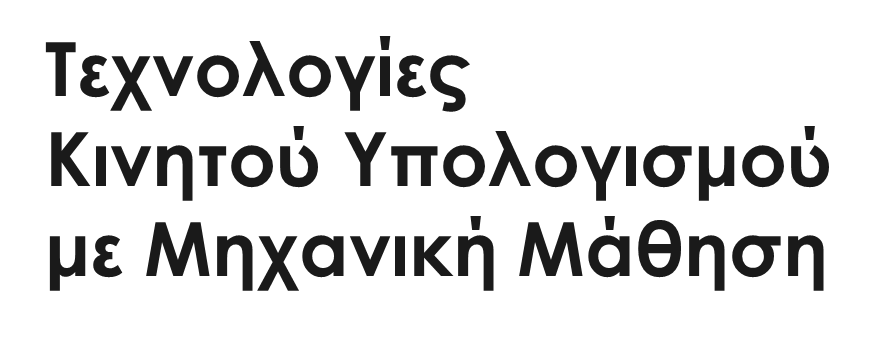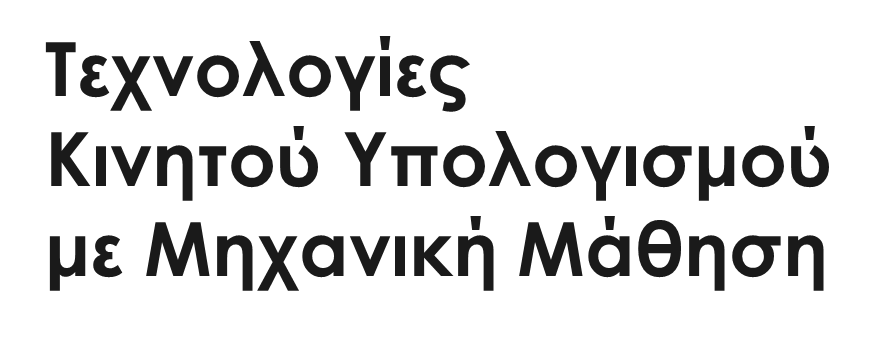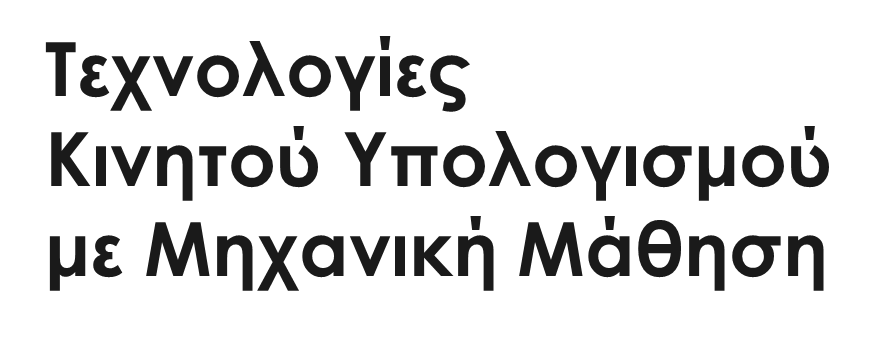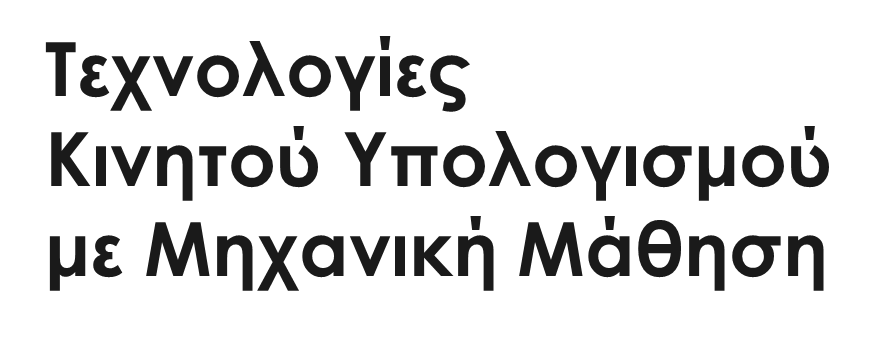
#### 1η Εργαστηριακή Άσκηση 

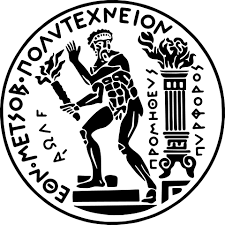

Σχολή Ηλεκτρολόγων Μηχανικών και Μηχανικών Υπολογιστών

Εργαστήρι Ευφυών Επικοινωνιών και Δικτύων Ευρείας Ζώνης

Εθνικό Μετσόβιο Πολυτεχνείο

9ο εξάμηνο

Ακ. Έτος 2024-2025



 `⚠️  Παρακαλείστε να μην δημοσιεύσετε τις απαντήσεις και υλοποιήσεις των εργαστηριακών ασκήσεων στο διαδίκτυο. Ο λόγος είναι η πιθανή επανάληψη των συγκεκριμένων ασκήσεων σε επόμενα ακαδημαικά έτη.`

 `⚠️  Τα χαρακτηριστικά του συνόλου δεδομένων που σας δόθηκαν μπορούν φυσικά να τροποποιηθούν με χρήση στατιστικών μεθόφων ή ακόμα και να παραλειφθούν. Ωστόσο, σε καμία περίπτωση, το σύνολο δεδομένων δεν πρέπει να εμπλουτισθεί με επιπλέον εγγραφές. Πιθανές τέτοιες ενέργειες θα κοστίσουν στην τελική βαθμολόγηση της εργασίας σας.`

Ονοματεπώνυμο φοιτητή:

Α.Μ.:

### 1. Εισαγωγή συνόλου δεδομένων

Η κάθε ομάδα μπορεί να κατεβάσει το προσωποποιημένο σύνολο δεδομένων για το training-(validation)-test από [εδώ](https://drive.google.com/drive/folders/1lO6elfOldaqSw7k-UWvZBZTWKdmisp5b?usp=sharing).



1.α. Φορτώστε το σύνολο δεδομένων στο notebook σας.

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [145]:
df = pd.read_csv('dataset_new(in).csv')

1.β. Τυπώστε τις πρώτες 5 ή 10 γραμμές του dataset για να δείτε ότι έχει φορτωθεί όπως πρέπει

In [146]:
df.head()

,X,Y,base_station_user,sector_of_BS_user,sector_user,ModulationType,Power_W_,BS_UEDistance_km_,BS_UEAngle_degrees_,Throughput_Mbps_
0,-1538.494704,1229.952836,10,1,28,QPSK,0.176421,2.175760,195.063406,379.315339
1,-1392.160776,1583.572523,9,1,25,16-QAM,0.053331,1.968813,326.605415,299.266046
2,34.900399,-1440.542036,1,1,1,QPSK,0.000312,0.049357,347.032825,1161.318447
3,-1482.404758,1613.021019,9,1,25,16-QAM,0.125557,2.096437,152.344674,814.071594
4,1451.921185,521.828373,12,2,35,64-QAM,0.017777,2.053327,314.814695,1192.715985


In [147]:
df.columns

Index(['X', 'Y', 'base_station_user', 'sector_of_BS_user', 'sector_user',
       'ModulationType', 'Power_W_', 'BS_UEDistance_km_',
       'BS_UEAngle_degrees_', 'Throughput_Mbps_'],
      dtype='object')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    10075 non-null  float64
 1   Y                    10075 non-null  float64
 2   base_station_user    10075 non-null  int64  
 3   sector_of_BS_user    10075 non-null  int64  
 4   sector_user          10075 non-null  int64  
 5   ModulationType       10075 non-null  object 
 6   Power_W_             10075 non-null  float64
 7   BS_UEDistance_km_    10075 non-null  float64
 8   BS_UEAngle_degrees_  10075 non-null  float64
 9   Throughput_Mbps_     10075 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 787.2+ KB


### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA) 
Με βάση το notebook της παρουσίασης της 2ης εργαστηριακής άσκησης δημιουργήστε code cells με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων. Συνίσταται η χρήση text cells για επεξήγηση των αποτελεσμάτων της EDA. 

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων (είναι ισοροππημένο το σύνολο δεδομένων;),

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών, 

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [262]:
df = pd.read_csv('dataset_new(in).csv')

In [263]:
df.shape

(10075, 10)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    10075 non-null  float64
 1   Y                    10075 non-null  float64
 2   base_station_user    10075 non-null  int64  
 3   sector_of_BS_user    10075 non-null  int64  
 4   sector_user          10075 non-null  int64  
 5   ModulationType       10075 non-null  object 
 6   Power_W_             10075 non-null  float64
 7   BS_UEDistance_km_    10075 non-null  float64
 8   BS_UEAngle_degrees_  10075 non-null  float64
 9   Throughput_Mbps_     10075 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 787.2+ KB


In [265]:
df.columns

Index(['X', 'Y', 'base_station_user', 'sector_of_BS_user', 'sector_user',
       'ModulationType', 'Power_W_', 'BS_UEDistance_km_',
       'BS_UEAngle_degrees_', 'Throughput_Mbps_'],
      dtype='object')

In [266]:
# We need to create balanced categories for the Throughput_Mbps_ column
df['Throughput_Mbps_'].describe()

count    10075.000000
mean       813.887653
std        399.745375
min        117.021646
25%        473.088025
50%        811.654472
75%       1160.667322
max       1499.884142
Name: Throughput_Mbps_, dtype: float64

In [268]:
df['Distance_From_Origin'] = np.sqrt(df['X']**2 + df['Y']**2)
df['Power_Distance_Ratio'] = df['Power_W_'] / (df['BS_UEDistance_km_'] + 1e-5)
df['BS_UEAngle_sin'] = np.sin(np.radians(df['BS_UEAngle_degrees_']))
df['BS_UEAngle_cos'] = np.cos(np.radians(df['BS_UEAngle_degrees_']))
df.drop('BS_UEAngle_degrees_', axis=1, inplace=True)
df['Power_Distance_Interaction'] = df['Power_W_'] * df['BS_UEDistance_km_']
df['ModulationType'] = df['ModulationType'].map({'QPSK': 0, '16-QAM': 1, '64-QAM': 2})
df['Modulation_Power_Interaction'] = df['ModulationType'] * df['Power_W_']

Text(0, 0.5, 'Frequency')

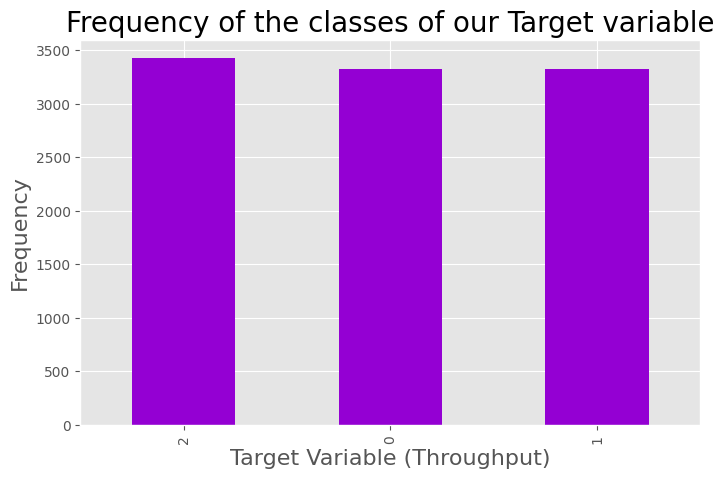

In [261]:
plt.style.use("ggplot")
df['Throughput_Mbps_'].value_counts().plot(kind="bar", 
                                  figsize = (8,5), color = "darkviolet")
plt.title("Frequency of the classes of our Target variable", size=20)
plt.xlabel("Target Variable (Throughput)", size = 16)
plt.ylabel("Frequency", size = 16)

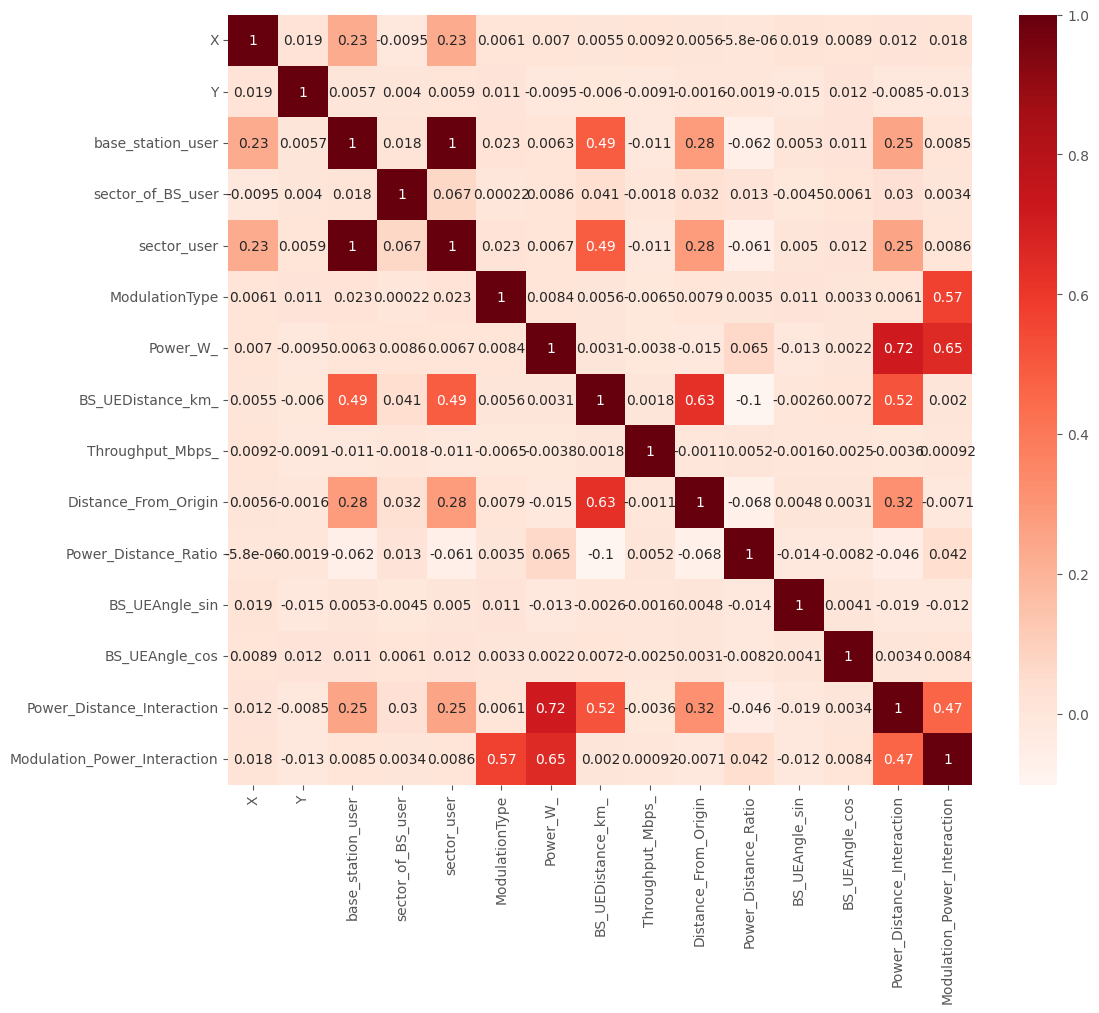

In [269]:
# Keep the non-categorical columns
df_numeric = df.select_dtypes(include=[np.number])
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
cor = df_numeric.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()



We can see that no variable is correlated with the target variable. 

We can see that `base_station_user` and `sector_user` are perfectly correlatred with each other, so we need to drop one of them.

In [270]:
# Drop the base_station_user column
df = df.drop(['base_station_user'], axis=1)

In [35]:
df.columns

Index(['X', 'Y', 'sector_of_BS_user', 'sector_user', 'ModulationType',
       'Power_W_', 'BS_UEDistance_km_', 'BS_UEAngle_degrees_',
       'Throughput_Mbps_'],
      dtype='object')

In [272]:
pseudo_categorical_columns = []
for column in df.columns:
    print(f"{column} : {df[column].nunique()}")
    if df[column].nunique() < 60:
        pseudo_categorical_columns.append(column)

X : 10075
Y : 10075
sector_of_BS_user : 3
sector_user : 57
ModulationType : 3
Power_W_ : 10075
BS_UEDistance_km_ : 10075
Throughput_Mbps_ : 3
Distance_From_Origin : 10075
Power_Distance_Ratio : 10075
BS_UEAngle_sin : 10075
BS_UEAngle_cos : 10075
Power_Distance_Interaction : 10075
Modulation_Power_Interaction : 6944


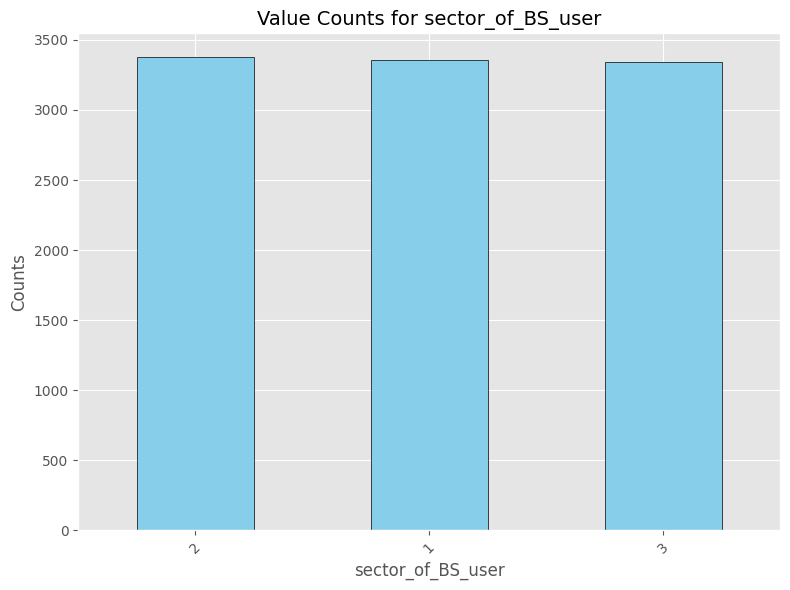

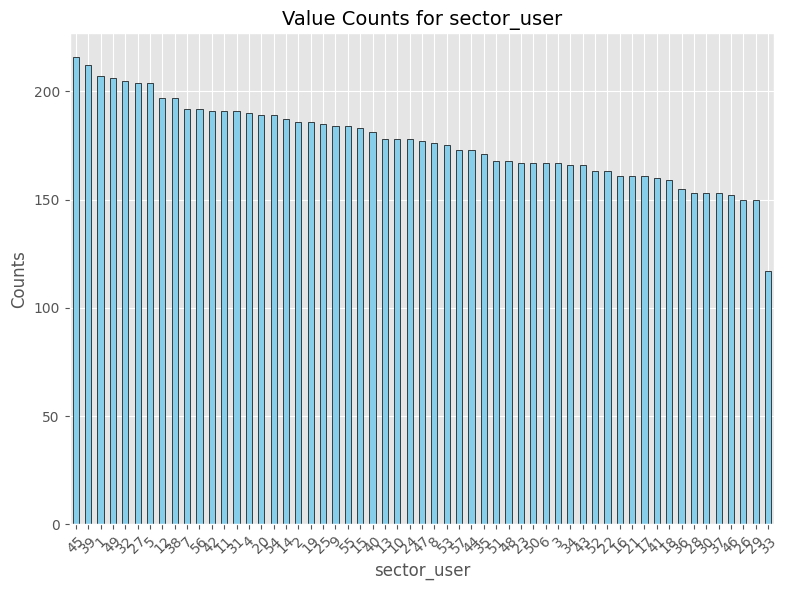

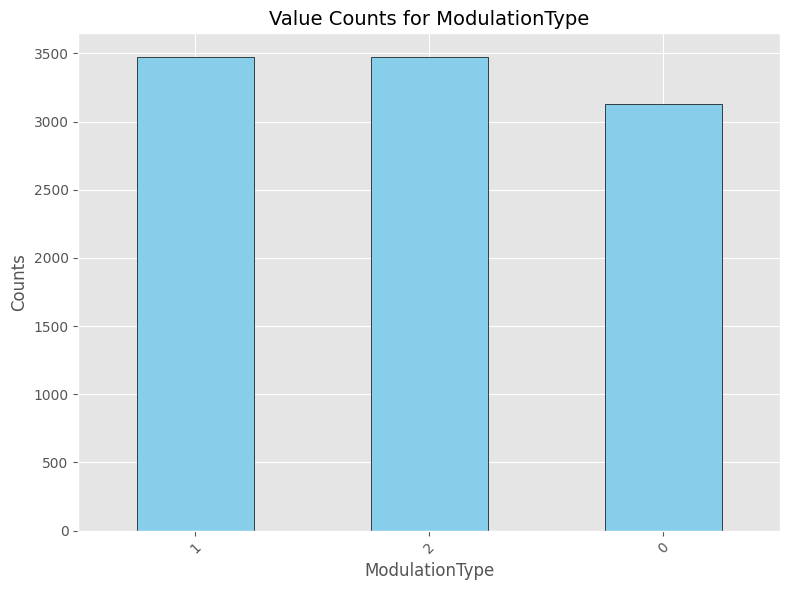

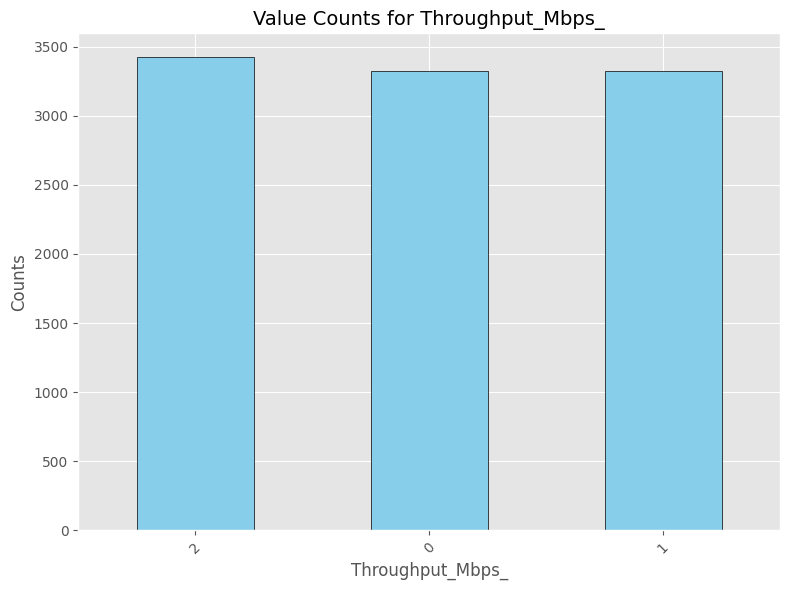

In [273]:
# Assuming df is your DataFrame
for column in pseudo_categorical_columns:
    plt.figure(figsize=(8, 6))  # Optional: Adjusts the size of each plot
    value_counts = df[column].value_counts()
    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title(f'Value Counts for {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Counts', fontsize=12)
    plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
    plt.tight_layout()       # Adjusts subplot params so that the subplot(s) fits in to the figure area.

    plt.show()

In [39]:
# Get the number of missing values for each column
df.isnull().sum()

X                      0
Y                      0
sector_of_BS_user      0
sector_user            0
ModulationType         0
Power_W_               0
BS_UEDistance_km_      0
BS_UEAngle_degrees_    0
Throughput_Mbps_       0
dtype: int64

In [42]:
from scipy.stats import normaltest, skew, kurtosis, probplot
from typing import List, Dict, Union

In [ ]:
def test_normality(df: pd.DataFrame, 
                  alpha: float = 0.05, 
                  plot: bool = True) -> Dict[str, Dict[str, Union[float, bool]]]:
    """
    Test normality of numerical columns in a DataFrame using multiple methods.
    
    Parameters:
    -----------
    df : pandas DataFrame
        Input DataFrame containing the data
    alpha : float, optional (default=0.05)
        Significance level for statistical tests
    plot : bool, optional (default=True)
        Whether to create visualization plots
        
    Returns:
    --------
    Dict containing test results for each numerical column
    """
    # Select numerical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) == 0:
        raise ValueError("No numerical columns found in the DataFrame")
    
    results = {}
    
    # Set up the plotting area if plotting is enabled
    if plot:
        n_cols = len(numeric_cols)
        fig_height = 4 * n_cols
        fig, axes = plt.subplots(n_cols, 3, figsize=(15, fig_height))
        if n_cols == 1:
            axes = axes.reshape(1, -1)
            
    for idx, column in enumerate(numeric_cols):
        # Get column data
        data = df[column].dropna()
        
        # Skip if too few data points
        if len(data) < 3:
            results[column] = {
                "error": "Insufficient data points for normality test"
            }
            continue
            
        k2_stat, k2_p = normaltest(data)
        
        # Calculate descriptive statistics
        skewness = skew(data)
        kurtosis_ = kurtosis(data)
        
        # Store results
        results[column] = {
            "dagostino_k2_test": {
                "statistic": k2_stat,
                "p_value": k2_p,
                "is_normal": k2_p > alpha
            },
            "descriptive_stats": {
                "skewness": skewness,
                "kurtosis": kurtosis_,
                "mean": np.mean(data),
                "median": np.median(data),
                "std": np.std(data)
            }
        }
        
        if plot:
            # Histogram with KDE
            sns.histplot(data=data, kde=True, ax=axes[idx, 0])
            axes[idx, 0].set_title(f'{column} - Distribution')
            
            # Q-Q plot
            probplot(data, dist="norm", plot=axes[idx, 1])
            axes[idx, 1].set_title(f'{column} - Q-Q Plot')
            
            # Box plot
            sns.boxplot(data=data, ax=axes[idx, 2])
            axes[idx, 2].set_title(f'{column} - Box Plot')
    
    if plot:
        plt.tight_layout()
        plt.show()
        
    return results



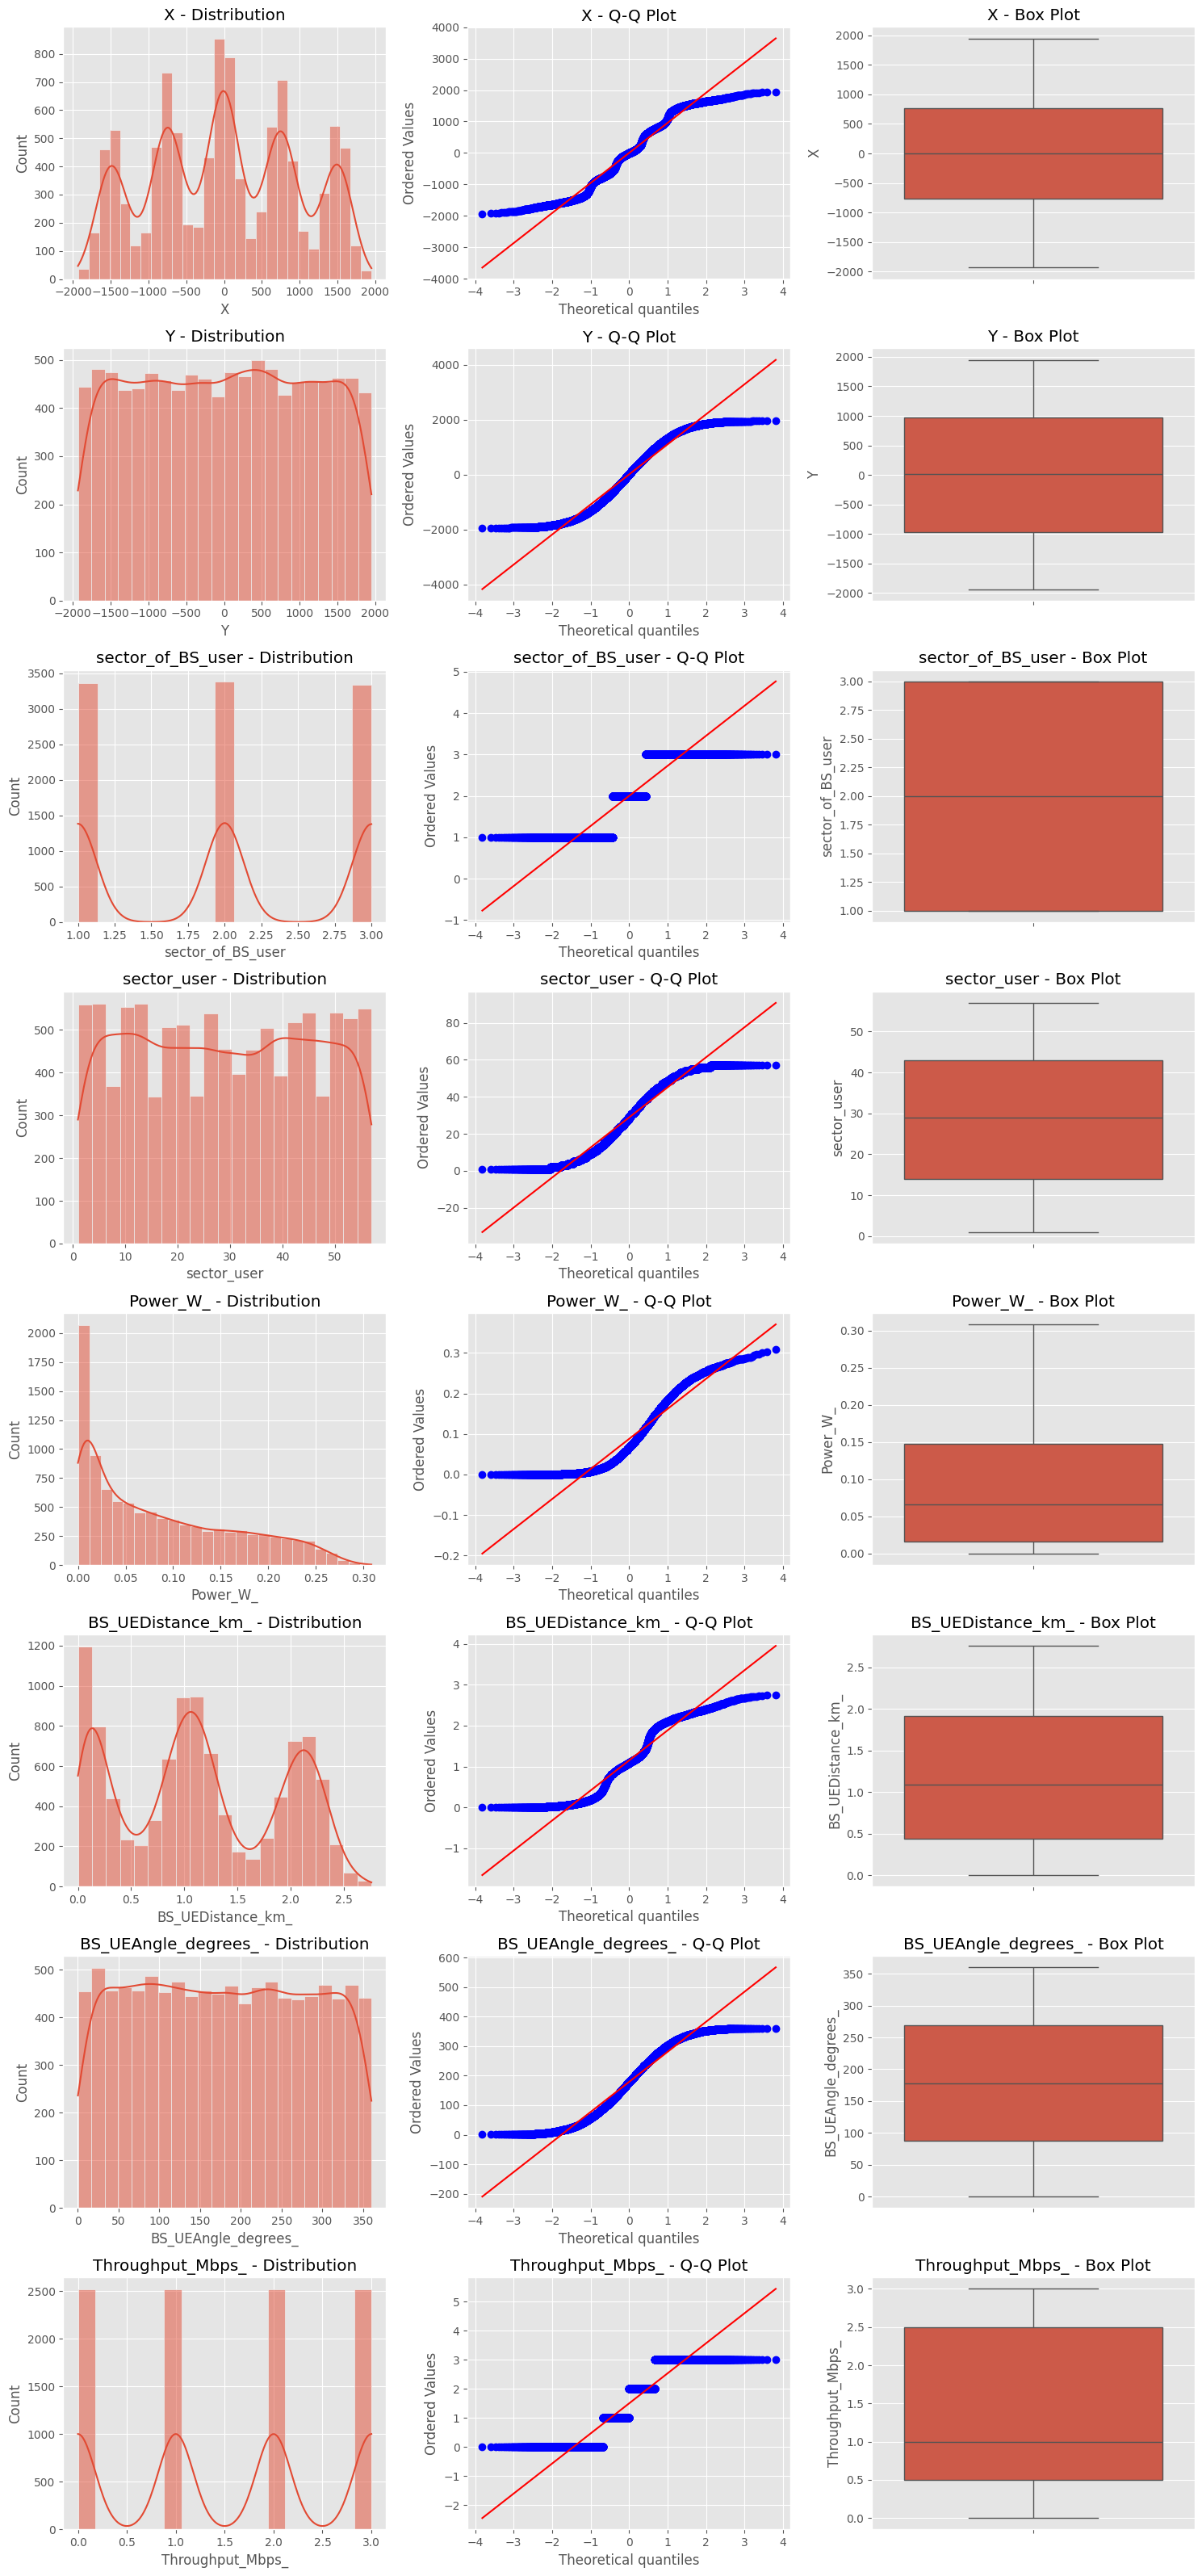


Column: X

Statistical Tests:
-----------------

D'Agostino K^2 Test:
Statistic: 2492.5094
P-value: 0.0000
Normal at α=0.05: No

Descriptive Statistics:
----------------------
Mean: -0.8735
Median: -4.3339
Standard Deviation: 973.1688
Skewness: 0.0077
Kurtosis: -1.0148

Column: Y

Statistical Tests:
-----------------

D'Agostino K^2 Test:
Statistic: 8451.0410
P-value: 0.0000
Normal at α=0.05: No

Descriptive Statistics:
----------------------
Mean: 5.1235
Median: 21.2383
Standard Deviation: 1118.0500
Skewness: -0.0056
Kurtosis: -1.1960

Column: sector_of_BS_user

Statistical Tests:
-----------------

D'Agostino K^2 Test:
Statistic: 62262.2543
P-value: 0.0000
Normal at α=0.05: No

Descriptive Statistics:
----------------------
Mean: 1.9987
Median: 2.0000
Standard Deviation: 0.8153
Skewness: 0.0024
Kurtosis: -1.4956

Column: sector_user

Statistical Tests:
-----------------

D'Agostino K^2 Test:
Statistic: 12361.0250
P-value: 0.0000
Normal at α=0.05: No

Descriptive Statistics:
--------

In [44]:
def print_normality_summary(results: Dict[str, Dict[str, Union[float, bool]]]) -> None:
    """
    Print a formatted summary of normality test results.
    
    Parameters:
    -----------
    results : Dict
        Results dictionary from test_normality function
    """
    for column, tests in results.items():
        print(f"\n{'='*50}")
        print(f"Column: {column}")
        print(f"{'='*50}")
        
        if "error" in tests:
            print(f"Error: {tests['error']}")
            continue
            
        # Print test results
        print("\nStatistical Tests:")
        print("-----------------")
        tests_info = {
            "dagostino_k2_test": "D'Agostino K^2",
        }
        
        for test_key, test_name in tests_info.items():
            test = tests[test_key]
            print(f"\n{test_name} Test:")
            print(f"Statistic: {test['statistic']:.4f}")
            print(f"P-value: {test['p_value']:.4f}")
            print(f"Normal at α=0.05: {'Yes' if test['is_normal'] else 'No'}")
        
        # Print descriptive statistics
        print("\nDescriptive Statistics:")
        print("----------------------")
        stats = tests["descriptive_stats"]
        print(f"Mean: {stats['mean']:.4f}")
        print(f"Median: {stats['median']:.4f}")
        print(f"Standard Deviation: {stats['std']:.4f}")
        print(f"Skewness: {stats['skewness']:.4f}")
        print(f"Kurtosis: {stats['kurtosis']:.4f}")

# Run tests
results = test_normality(df)

# Print summary
print_normality_summary(results)

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Επεξεργαστείτε τα χαρακτηριστικά του συνόλου δεδομένων σας. Αν θεωρείτε ότι κάποια χαρακτηριστικά θα πρέπει να μετασχηματιστούν κάντε το χρησιμοποιώντας τους OneHotEncoder και LabelEncoder (αριθμητικά και κατηγορικά δεδομένα).`




In [157]:
pseudo_categorical_columns

['sector_of_BS_user', 'sector_user', 'ModulationType', 'Throughput_Mbps_']

In [274]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Label Encode columns 'sector_of_BS_user', 'sector_user'
le = LabelEncoder()
df['sector_of_BS_user'] = le.fit_transform(df['sector_of_BS_user'])
df['sector_user'] = le.fit_transform(df['sector_user'])

In [275]:
# OneHot encode the categorical columns
df['ModulationType'].value_counts()

ModulationType
1    3473
2    3470
0    3132
Name: count, dtype: int64

In [204]:
# Map ModulationType where 0 = 'QPSK', 1 = '16QAM', 2 = '64QAM
df['ModulationType'] = df['ModulationType'].map({'QPSK': 0, '16-QAM': 1, '64-QAM': 2})

3.α.  Το σύνολο δεδομένων σας περιέχει Null values; Αν όχι αποδείξτε το με κατάλληλη εντολή. Αν ναι θα αντικαταστήσετε αυτές τις τιμές ή θα τις παραλείψετε απλώς. (Εξηγήστε)

In [276]:
# Get the number of missing values for each column
df.isnull().sum()

X                               0
Y                               0
sector_of_BS_user               0
sector_user                     0
ModulationType                  0
Power_W_                        0
BS_UEDistance_km_               0
Throughput_Mbps_                0
Distance_From_Origin            0
Power_Distance_Ratio            0
BS_UEAngle_sin                  0
BS_UEAngle_cos                  0
Power_Distance_Interaction      0
Modulation_Power_Interaction    0
dtype: int64

In [206]:
df.shape

(10075, 10)

3.β.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ML models ή κάνετε κάποια επιλογή;  Εξηγήστε. 


We can see that `base_station_user` and `sector_user` are perfectly correlatred with each other, so we need to drop one of them.

In [207]:
df = df.drop(['base_station_user'], axis=1)

3.γ. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [277]:
# Get the number of missing values for each column
df.isna().sum()

X                               0
Y                               0
sector_of_BS_user               0
sector_user                     0
ModulationType                  0
Power_W_                        0
BS_UEDistance_km_               0
Throughput_Mbps_                0
Distance_From_Origin            0
Power_Distance_Ratio            0
BS_UEAngle_sin                  0
BS_UEAngle_cos                  0
Power_Distance_Interaction      0
Modulation_Power_Interaction    0
dtype: int64

In [ ]:
def remove_correlated_features(X, threshold=0.5):
    """
    Αφαιρεί τα υψηλά συσχετισμένα χαρακτηριστικά από το σύνολο δεδομένων.
    
    Parameters:
    -----------
    X : DataFrame
        DataFrame με τα αρχικά και τα μηχανικά χαρακτηριστικά
    threshold : float, default=0.6
        Όριο συσχέτισης πάνω από το οποίο αφαιρούνται τα χαρακτηριστικά
        
    Returns:
    --------
    X_filtered : DataFrame
        DataFrame με τα επιλεγμένα χαρακτηριστικά
    removed_features : dict
        Λεξικό με τα αφαιρεμένα χαρακτηριστικά και τις συσχετίσεις τους
    """
    # Υπολογισμός πίνακα συσχέτισης
    corr_matrix = X.corr().abs()
    
    # Δημιουργία άνω τριγωνικού πίνακα
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Εύρεση χαρακτηριστικών με συσχέτιση πάνω από το όριο
    removed_features = {}
    to_drop = []
    
    for column in upper.columns:            
        high_corr = upper[column][upper[column] > threshold]
        if not high_corr.empty:
            for index in high_corr.index:
                if index not in to_drop:
                    removed_features[index] = {
                        'correlated_with': column,
                        'correlation': high_corr[index]
                    }
                    to_drop.append(index)
    
    X_filtered = X.drop(columns=to_drop)
    
    return X_filtered, removed_features

# Remove correlated features
df_filtered, removed_features = remove_correlated_features(df.drop('Throughput_Mbps_', axis=1))
df_filtered['Throughput_Mbps_'] = df['Throughput_Mbps_']

3.δ. Επιτελέστε κλιμάκωση των χαρακτηριστικών του συνόλου δεδομένων σας (αν την θεωρείτε απαραίτητη). Σε αυτήν την περίπτωση χρησιμοποιήστε τον MimMaxScaler

In [278]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply the MinMax Scaler to the dataset except the target variable
df_scaled = df.drop('Throughput_Mbps_', axis=1)
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
df_scaled['Throughput_Mbps_'] = df['Throughput_Mbps_']
df_scaled.head()


,X,Y,sector_of_BS_user,sector_user,ModulationType,Power_W_,BS_UEDistance_km_,Distance_From_Origin,Power_Distance_Ratio,BS_UEAngle_sin,BS_UEAngle_cos,Power_Distance_Interaction,Modulation_Power_Interaction,Throughput_Mbps_
0,0.101761,0.814880,0.0,0.482143,0.0,0.572263,0.789195,0.752608,0.000166,0.370056,0.017181,0.558884,0.000000,0
1,0.139447,0.905973,0.0,0.428571,0.5,0.172989,0.714120,0.805902,0.000056,0.224799,0.917450,0.152878,0.090599,0
2,0.506960,0.126952,0.0,0.000000,0.0,0.001007,0.017785,0.549590,0.000013,0.387804,0.987249,0.000022,0.000000,2
3,0.116206,0.913559,0.0,0.428571,0.5,0.407272,0.760419,0.837477,0.000123,0.732076,0.057122,0.383250,0.213296,1
4,0.871888,0.632465,0.5,0.607143,1.0,0.057661,0.744779,0.588709,0.000018,0.145305,0.852408,0.053148,0.060400,2


3.ε. Αφού έχετε επεξεργαστεί (μέσω των προηγουμένων βημάτων) το σύνολο δεδομένων σας, χωρίστε το σε σύνολο εκπαίδευσης και σύνολο επαλήθευσης. Ξεκινήστε με μια αναλογία 80%-20%. Πειραματιστείτε με διαφορετικές τιμές αν το κρίνετε απαραίτητο για την βελτίωση των δεικτών απόδοσης.

💡 `Η στήλη 'Troughput' είναι αυτή που θα πρέπει να χρησιμοποιηθεί ως μεταβλητή απόκρισης στο Classification πρόβλημα που καλείστε να επιλύσετε.` 

In [279]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df_scaled.drop('Throughput_Mbps_', axis=1)
y = df_scaled['Throughput_Mbps_']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3.στ. Χρησιμοποιήστε την τεχνική Chi-Squared Feature Selection για να μελετήσετε την σημαντικότητα του εκάστοτε χαρακτηριστικού

In [293]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# Keep the 4 best features
X_train_fs.shape, X_test_fs.shape


((8060, 2), (2015, 2))

3.ζ. Δημιουργήστε κατάλληλο διάγραμμα ώστε να αποτυπώσετε την μελετούμενη σημαντικότητα

Feature 0: 0.412697
Feature 1: 0.671603
Feature 2: 0.179035
Feature 3: 0.416746
Feature 4: 0.263483
Feature 5: 1.603234
Feature 6: 0.551820
Feature 7: 0.000035
Feature 8: 0.129563
Feature 9: 0.305042
Feature 10: 1.590981
Feature 11: 1.124382
Feature 12: 0.633068


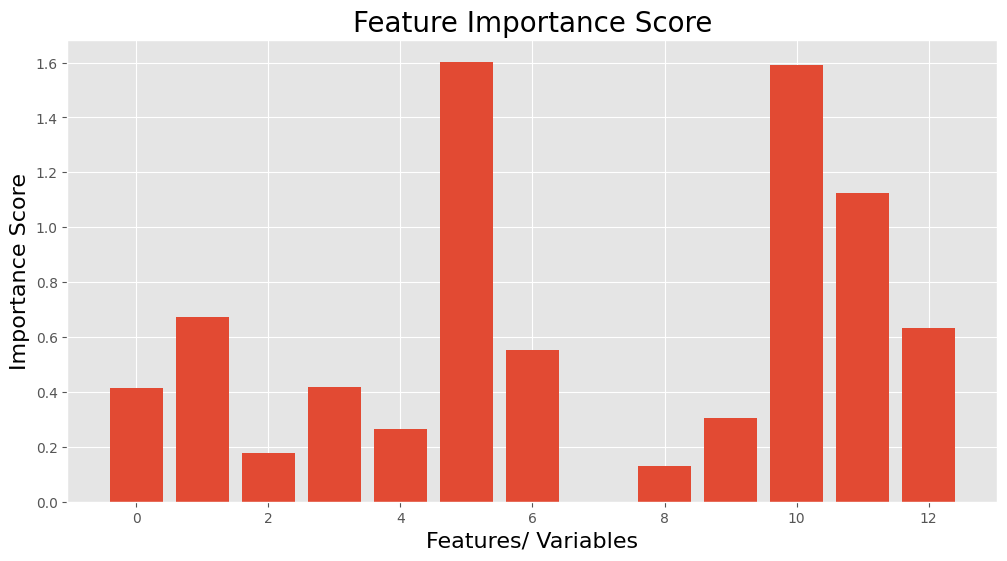

In [294]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize = (12,6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Feature Importance Score", size = 20)
plt.xlabel("Features/ Variables", size = 16, color = "black")
plt.ylabel("Importance Score", size = 16, color = "black")
plt.show()

### 4. Εκπαίδευση ML μοντέλων για την αντιμετώπιση του Throughput prediction ως πρόβλημα παλινδρόμισης

Θα εκπαιδεύσετε τους ML αλγορίθμους που σας έχουν γνωστοποιηθεί μέσω προσωπικού μηνύματος ξεκινώντας με default τιμές στις παραμέτρους αυτών


4.α. Φορτώστε τις κατάλληλες βιβλιοθήκες

In [295]:
# Load Xgboot regressor
from xgboost import XGBRegressor

xgb = XGBRegressor()

# Fit the model
xgb.fit(X_train, y_train)

# Get the feature importance
importance = xgb.feature_importances_

# Summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
    

Feature: 0, Score: 0.05410
Feature: 1, Score: 0.06839
Feature: 2, Score: 0.06182
Feature: 3, Score: 0.07370
Feature: 4, Score: 0.06415
Feature: 5, Score: 0.07918
Feature: 6, Score: 0.08072
Feature: 7, Score: 0.08108
Feature: 8, Score: 0.09026
Feature: 9, Score: 0.08328
Feature: 10, Score: 0.08316
Feature: 11, Score: 0.09424
Feature: 12, Score: 0.08590


In [296]:
y_pred_svm = xgb.predict(X_test_fs)

ValueError: Feature shape mismatch, expected: 13, got 2

In [297]:
# Get RMSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred_svm))
mae = mean_absolute_error(y_test, y_pred_svm)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 1.1400666037746143
MAE: 0.886848635235732


In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Classification: kNN, Linear SVM, Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

svm = SVC()
knn = KNeighborsClassifier()
log_reg = LogisticRegression()


4.β. Εκπαιδεύστε (fit) τους ML αλγορίθμους σας χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [299]:
# Fit the models
svm.fit(X_train_fs, y_train)
knn.fit(X_train_fs, y_train)
log_reg.fit(X_train_fs, y_train)


LogisticRegression()

GPU Available: False
Epoch 1/100
202/202 [==============================] - 1s 2ms/step - loss: 1.0995 - accuracy: 0.3334 - val_loss: 1.0993 - val_accuracy: 0.3257
Epoch 2/100
202/202 [==============================] - 0s 1ms/step - loss: 1.0988 - accuracy: 0.3342 - val_loss: 1.0978 - val_accuracy: 0.3536
Epoch 3/100
202/202 [==============================] - 0s 1ms/step - loss: 1.0985 - accuracy: 0.3426 - val_loss: 1.0982 - val_accuracy: 0.3263
Epoch 4/100
202/202 [==============================] - 0s 1ms/step - loss: 1.0981 - accuracy: 0.3435 - val_loss: 1.0983 - val_accuracy: 0.3282
Epoch 5/100
202/202 [==============================] - 0s 1ms/step - loss: 1.0982 - accuracy: 0.3474 - val_loss: 1.0998 - val_accuracy: 0.3269
Epoch 6/100
202/202 [==============================] - 0s 1ms/step - loss: 1.0981 - accuracy: 0.3437 - val_loss: 1.0999 - val_accuracy: 0.3251
Epoch 7/100
202/202 [==============================] - 0s 1ms/step - loss: 1.0981 - accuracy: 0.3497 - val_loss: 1.0997 -

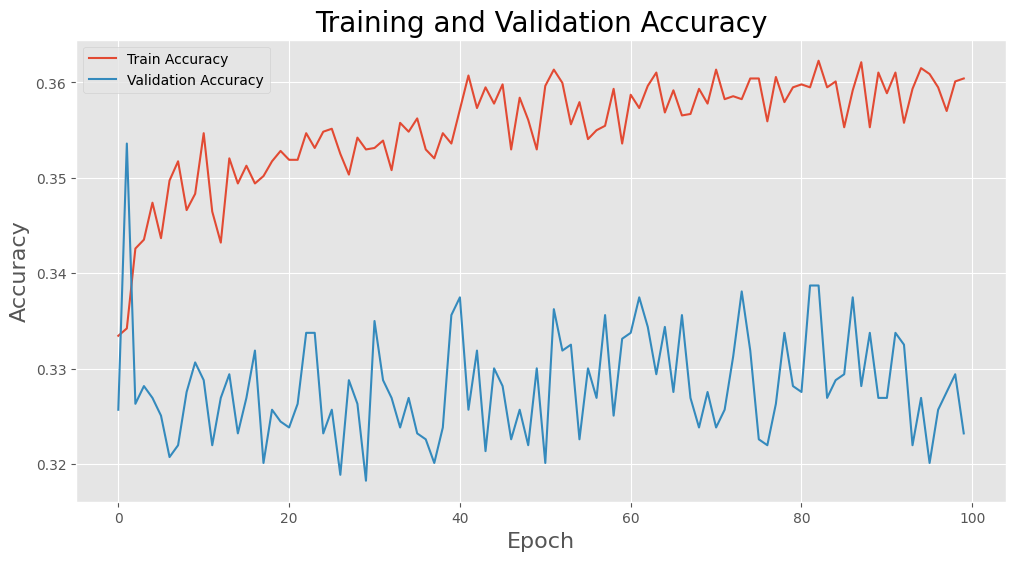

63/63 [==============================] - 0s 790us/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_fs.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

print("GPU Available:", tf.test.is_built_with_cuda())

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train_fs, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy', size=20)
plt.xlabel('Epoch', size=16)
plt.ylabel('Accuracy', size=16)
plt.legend()
plt.show()

4.γ. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το test set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [300]:
# Predict the target variable
y_pred_svm = svm.predict(X_test_fs)
y_pred_knn = knn.predict(X_test_fs)
y_pred_log_reg = log_reg.predict(X_test_fs)


In [301]:
preds = [y_pred_svm, y_pred_knn, y_pred_log_reg]

4.δ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του test set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας τις ML μετρικές (ML KPIs) που αναφέρονται στην εκφώνηση της 2ης εργαστηριακής άσκησης (θα χρειαστεί import των αντίστοιχων μετρικών από το sklearn).

In [302]:
for pred in preds:
    print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.30      0.37      0.34       657
           1       0.33      0.35      0.34       673
           2       0.33      0.24      0.27       685

    accuracy                           0.32      2015
   macro avg       0.32      0.32      0.32      2015
weighted avg       0.32      0.32      0.32      2015

              precision    recall  f1-score   support

           0       0.33      0.49      0.40       657
           1       0.35      0.33      0.34       673
           2       0.34      0.21      0.26       685

    accuracy                           0.34      2015
   macro avg       0.34      0.34      0.33      2015
weighted avg       0.34      0.34      0.33      2015

              precision    recall  f1-score   support

           0       0.34      0.20      0.25       657
           1       0.33      0.33      0.33       673
           2       0.32      0.45      0.38       685

    accuracy        

In [247]:
df

,X,Y,sector_of_BS_user,sector_user,ModulationType,Power_W_,BS_UEDistance_km_,BS_UEAngle_degrees_,Throughput_Mbps_
0,-1538.494704,1229.952836,0,27,0,0.176421,2.175760,195.063406,0
1,-1392.160776,1583.572523,0,24,1,0.053331,1.968813,326.605415,0
2,34.900399,-1440.542036,0,0,0,0.000312,0.049357,347.032825,2
3,-1482.404758,1613.021019,0,24,1,0.125557,2.096437,152.344674,1
4,1451.921185,521.828373,1,34,2,0.017777,2.053327,314.814695,2
...,...,...,...,...,...,...,...,...,...
10070,-1399.751609,582.952725,0,27,1,0.152208,1.979548,29.189773,2
10071,1003.099690,1643.193707,2,17,0,0.148239,1.418597,286.918428,1
10072,-102.410930,1534.187690,1,22,2,0.048374,0.144831,136.795465,2
10073,-1622.844157,1938.431436,1,25,1,0.115437,2.295048,329.784221,2


4.στ. Απεικονίστε την παραπάνω αξιολόγηση με χρήση γραφήματος/γραφημάτων (π.χ. ιστόγραμμα, bar plot κατά προτίμιση της Matplotlib)

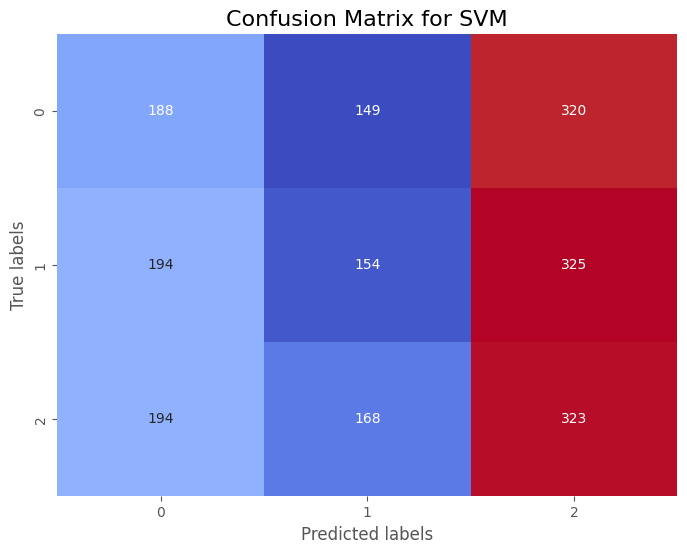

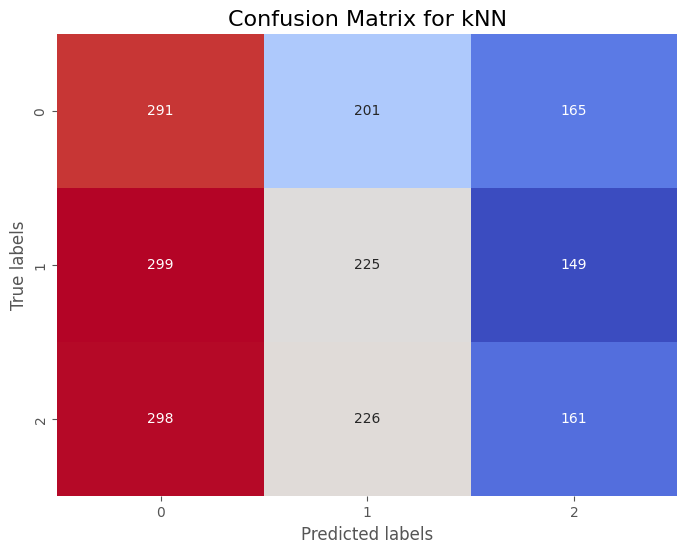

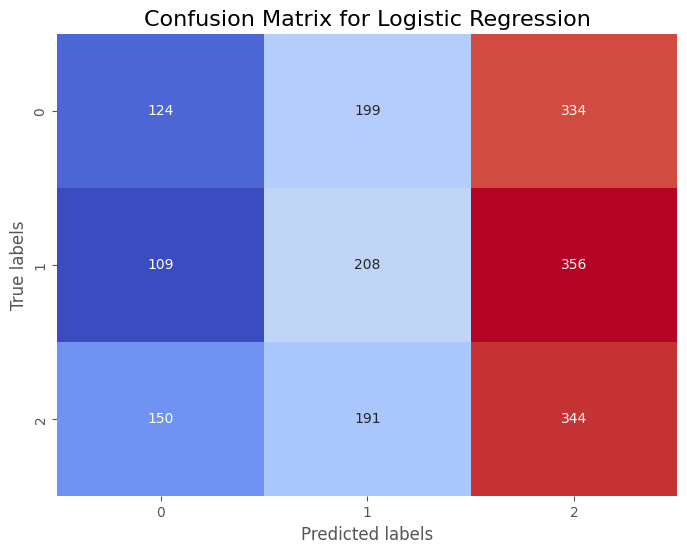

In [245]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}', size=16)
    plt.show()
    
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')
plot_confusion_matrix(y_test, y_pred_knn, 'kNN')
plot_confusion_matrix(y_test, y_pred_log_reg, 'Logistic Regression')

4.ζ Σχολιάστε στην αναφορά σας το ποιο μοντέλο είχε την καλύτερη επίδοση. Ήταν αυτό αναμενόμενο με βάση τη θεωρία του 3.2 κεφαλαίου των σημειώσεών σας;

4.η Κάνοντας δοκιμές στις υπερπαραμέτρους των ML αλγορίθμων που υλοποιήσατε, προσπαθήστε να βελτιώσετε την επίδοσή τους με βάση τις μετρικές τις οποίες έχετε επιλέξει

[I 2024-12-26 15:23:42,457] A new study created in memory with name: SVC_optimization
[I 2024-12-26 15:23:42,459] Trial 0 pruned. Trial failed: Invalid parameter 'classifier' for estimator SVC(). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].
[I 2024-12-26 15:23:42,462] Trial 1 pruned. Trial failed: Invalid parameter 'classifier' for estimator SVC(). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].


[I 2024-12-26 15:23:42,463] Trial 2 pruned. Trial failed: Invalid parameter 'classifier' for estimator SVC(). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].
[I 2024-12-26 15:23:42,464] Trial 3 pruned. Trial failed: Invalid parameter 'classifier' for estimator SVC(). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].
[I 2024-12-26 15:23:42,469] Trial 4 pruned. Trial failed: Invalid parameter 'classifier' for estimator SVC(). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].
[I 2024-12-26 15:23:42,472] Trial 


Optimizing SVC...


[I 2024-12-26 15:23:42,568] Trial 30 pruned. Trial failed: Invalid parameter 'classifier' for estimator SVC(). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].
[I 2024-12-26 15:23:42,570] Trial 31 pruned. Trial failed: Invalid parameter 'classifier' for estimator SVC(). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].
[I 2024-12-26 15:23:42,571] Trial 29 pruned. Trial failed: Invalid parameter 'classifier' for estimator SVC(). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].
[I 2024-12-26 15:23:42,575] Tri

ValueError: No trials are completed yet.

### Bonus Ερώτημα

Για μια πιο αποτελεσματική εύρεση των υπερπαραμέτρων που βελτιστοποιούν την απόδοση των ML αλγορίθμων, γίνεται χρήση κάποιας συστηματικής αναζήτησης. Δοκιμάστε αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 10) (Πληροφορίες [εδώ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)) ή/και HalvingGridSearch (Πληροφορίες [εδώ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html)) με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων. 

Εφαρμόστε στα εκπαιδευμένα μοντέλα από το test set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).

Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του test set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας τις ML μετρικές (ML KPIs) που αναφέρονται στην εκφώνηση της 2ης εργαστηριακής άσκησης.

Απεικονίστε την παραπάνω αξιολόγηση με χρήση γραφήματος/γραφημάτων (π.χ. ιστόγραμμα, bar plot κατά προτίμιση της Matplotlib)

Σχολιάστε στην αναφορά σας το ποιο μοντέλο είχε την καλύτερη επίδοση. Ήταν αυτό αναμενόμενο με βάση τη θεωρία του 3.2 κεφαλαίου των σημειώσεών σας; Σχολιάστε επίσης την βελτίωση σε σχέση με την default υλοποίηση